In [154]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets.samples_generator import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets.samples_generator import make_blobs

from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import StratifiedKFold

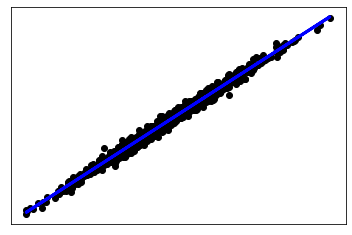

In [94]:
# 线性可分回归数据
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
X, y, coef =make_regression(n_samples=1000, n_features=1,noise=10, coef=True)
# 画图
plt.scatter(X, y,  color='black')
plt.plot(X, X*coef, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

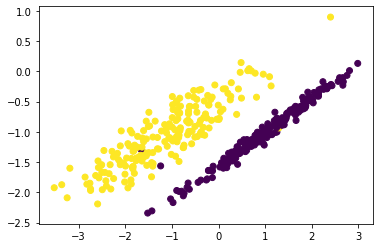

In [142]:
# 分类数据
# X1为样本特征，Y1为样本类别输出， 共400个样本，每个样本2个特征，输出有3个类别，
# 没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

wx+b=0,相当与coef_1 × x + coef_2 × y + b = 0

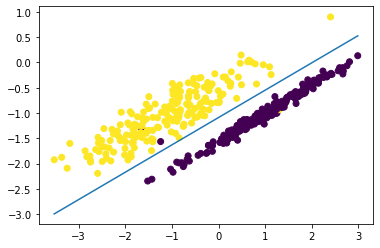

In [153]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

# 暂时不用
clf = LogisticRegression(C=1e5, max_iter=50000)
# Create an instance of Logistic Regression Classifier and fit the data.
clf.fit(X1, np.ravel(Y1))
import copy
xl = copy.deepcopy(X1[:, 0])
xl.sort()
Y1_V = []
for i in xl:
    v = clf.coef_[0][0]/clf.coef_[0][1] * i * -1 -  clf.intercept_/clf.coef_[0][1]
    Y1_V.append(v)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.plot(xl, Y1_V)
plt.show()

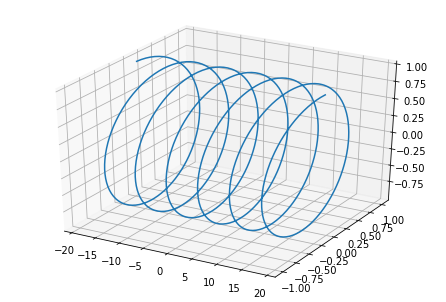

In [87]:
# 生成数据
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
y = np.sin(x)
z = np.cos(x)

# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 绘制线型图
ax.plot(x, y, z)

# 显示图
plt.show()

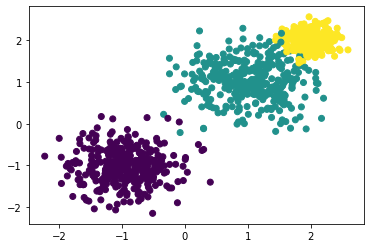

In [34]:
# 聚类数据
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1,-1], [1,1], [2,2]， 簇方差分别为[0.4, 0.5, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [1,1], [2,2]], cluster_std=[0.4, 0.5, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

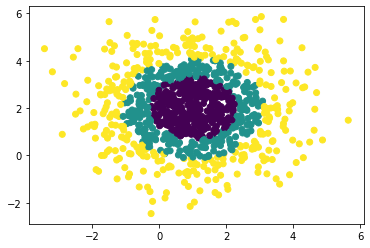

In [36]:
# 高斯混合数据
#生成2维正态分布，生成的数据按分位数分成3组，1000个样本,2个样本特征均值为1和2，协方差系数为2
X1, Y1 = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3, mean=[1,2],cov=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

In [61]:
wd_df = pd.read_csv('watermelon_dataset.csv', sep=',', index_col=0)

In [62]:
wd_df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [63]:
set(wd_df["好瓜"].tolist())

{'否', '是'}

In [64]:
color_switch = {
    "乌黑":1,
    "浅白":2,
    "青绿":3
}
root_switch = {
    "硬挺":1,
    "稍蜷":2,
    "蜷缩":3
}
knock_switch = {
    "沉闷":1,
    "浊响":2,
    "清脆":3
}
texture_switch = {
    "模糊":1,
    "清晰":2,
    "稍糊":3 
}
umbilical_switch = {
    "凹陷":1,
    "平坦":2,
    "稍凹":3 
}

touch_switch = {
    "硬滑":1,
    "软粘":2
}

label_switch = {
    "否":0,
    "是":1
}

df = pd.DataFrame()
for idx, row in watermelon_dataset.iterrows():
    df.loc[idx, "color"] = color_switch[row["色泽"]] 
    df.loc[idx, "root"] = root_switch[row["根蒂"]]
    df.loc[idx, "knock"] = knock_switch[row["敲声"]]
    
    df.loc[idx, "texture"] = texture_switch[row["纹理"]]
    df.loc[idx, "umbilical"] = umbilical_switch[row["脐部"]]
    df.loc[idx, "touch"] = touch_switch[row["触感"]]
    
    df.loc[idx, "density"] = row["密度"]
    df.loc[idx, "sugar_rate"] = row["含糖率"]
    
    df.loc[idx, "label"] = label_switch[row["好瓜"]]
    

In [67]:
#df.to_csv("wm_data_o.csv",index=False)
df.to_csv("wm_data_o.csv",index=True)

In [60]:
# 生成libsvm数
fp = open("wm_data.csv", "w")
cols = df.columns.tolist()
for idx, row in df.iterrows():
    fp.write(str(row["label"]))
    for i in range(len(cols)):
        if cols[i] == "label":
            continue
        fp.write(" " + str(i) + ":" + str(row[cols[i]]))
    fp.write("\n")
fp.flush()
        

In [59]:
df.columns

Index(['color', 'root', 'knock', 'texture', 'umbilical', 'touch', 'density',
       'sugar_rate', 'label'],
      dtype='object')

In [55]:
# 数据集：https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjUhtGg2ZLtAhVQa94KHU1zCjEQFjAAegQIAhAC&url=https%3A%2F%2Fgrouplens.org%2Fdatasets%2Fmovielens%2F100k%2F&usg=AOvVaw2IKRDYBl-x8eE3P_8hPpjx
# 数据处理：参考 http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [166]:
# 使用
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [10, 11], [11, 12], [13, 14], [15, 16]])
y = np.array([0, 0, 1, 1,0,0,1,1])
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(X, y)
len(X)

8

In [167]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3 4 5 6 7] TEST: [0 2]
TRAIN: [0 2 4 5 6 7] TEST: [1 3]
TRAIN: [0 1 2 3 5 7] TEST: [4 6]
TRAIN: [0 1 2 3 4 6] TEST: [5 7]
